### You are a data scientist working for a healthcare company, and you have been tasked with creating a decision tree to help identify patients with diabetes based on a set of clinical variables. You have been given a dataset (diabetes.csv) with the following variables:

##### 1. Pregnancies: Number of times pregnant (integer)
##### 2. Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test (integer)
##### 3. BloodPressure: Diastolic blood pressure (mm Hg) (integer)
##### 4. SkinThickness: Triceps skin fold thickness (mm) (integer)
##### 5. Insulin: 2-Hour serum insulin (mu U/ml) (integer)
##### 6. BMI: Body mass index (weight in kg/(height in m)^2) (float)
##### 7. DiabetesPedigreeFunction: Diabetes pedigree function (a function which scores likelihood of diabetes based on family history) (float)
##### 8. Age: Age in years (integer)
##### 9. Outcome: Class variable (0 if non-diabetic, 1 if diabetic) (integer)

#### Your goal is to create a decision tree to predict whether a patient has diabetes based on the other variables. Here are the steps you can follow:

## Q1. Import the dataset and examine the variables. Use descriptive statistics and visualizations to understand the distribution and relationships between the variables.

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   

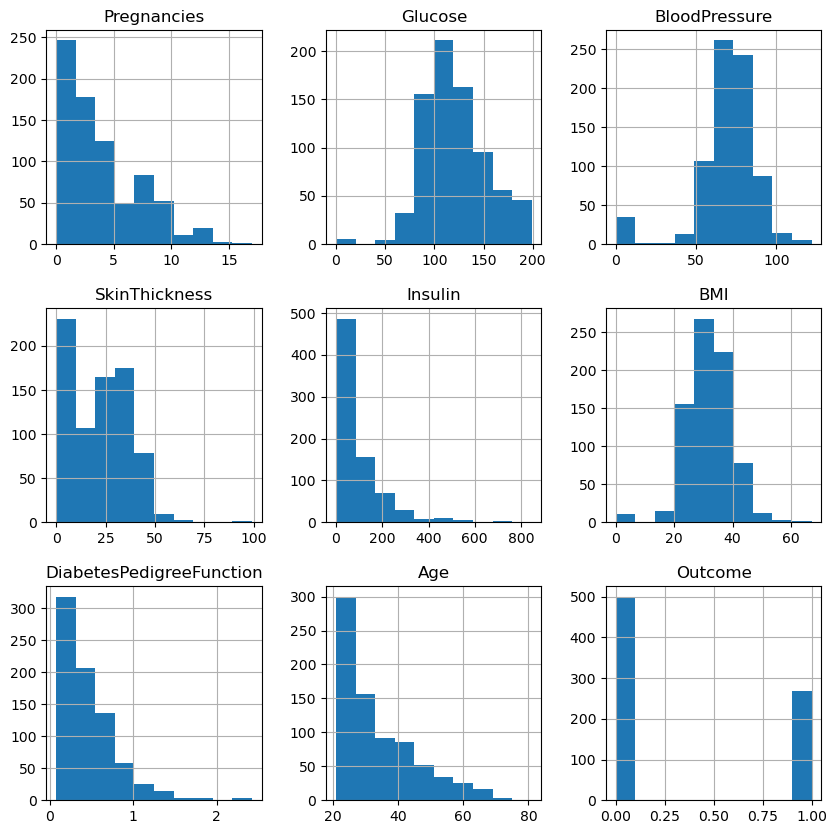

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

df=pd.read_csv('diabetes (1).csv')

print(df.head())

print(df.describe())

df.hist(figsize=(10,10))

plt.show()

## Insights for above Univariate Analysis

#### 1.Glucose feature has 0 values which does not make sense, need to replace 0 values with median.
#### 2.Skin Thickness feature also has 0 values which also does not make sense, need to replace 0 values with median.
#### 3.Insulin feature also has 0 values which does not make sense, replace this 0 values with median.
#### 4.BMI feature also has 0 values which does not make sense, replace this 0 values with median.
#### 5.Blood Pressure feature has 0 values which does not make sense, replace this 0 values with median.

## Question 2 : Preprocess the data by cleaning missing values, removing outliers, and transforming categorical variables into dummy variables if necessary.

In [3]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from scipy.stats import zscore

# Importing the dataset
diabetes = pd.read_csv('diabetes (1).csv')

# Replacing 0 values with NaN in the columns 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI'
diabetes[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = diabetes[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].replace(0, np.nan)

# Handling missing values using mean imputation
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
diabetes[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = imputer.fit_transform(diabetes[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']])

# Removing outliers using z-score
z_scores = zscore(diabetes[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']])
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
diabetes = diabetes[filtered_entries]

# Transforming categorical variable 'Outcome' into binary variable using mapping
diabetes['Outcome'] = diabetes['Outcome'].map({1: 'Yes', 0: 'No'})

# Transforming categorical variable 'Outcome' into dummy variables
diabetes = pd.get_dummies(diabetes, columns=['Outcome'])

# Printing the first 5 rows of the preprocessed dataset
print(diabetes.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin   BMI  \
0            6    148.0           72.0       35.00000  155.548223  33.6   
1            1     85.0           66.0       29.00000  155.548223  26.6   
2            8    183.0           64.0       29.15342  155.548223  23.3   
3            1     89.0           66.0       23.00000   94.000000  28.1   
4            0    137.0           40.0       35.00000  168.000000  43.1   

   DiabetesPedigreeFunction  Age  Outcome_No  Outcome_Yes  
0                     0.627   50           0            1  
1                     0.351   31           1            0  
2                     0.672   32           0            1  
3                     0.167   21           1            0  
4                     2.288   33           0            1  


## Q3. Split the dataset into a training set and a test set. Use a random seed to ensure reproducibility.

In [34]:
# Importing the necessary library
from sklearn.model_selection import train_test_split
import pandas as pd

df=pd.read_csv('diabetes (1).csv')
# Defining the features and target variables
X = diabetes.drop(['Outcome_No', 'Outcome_Yes'], axis=1)
y = diabetes['Outcome_Yes']

# Splitting the dataset into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Printing the shapes of the training set and the test set
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (588, 8)
Shape of X_test: (148, 8)
Shape of y_train: (588,)
Shape of y_test: (148,)


## Q4. Use a decision tree algorithm, such as ID3 or C4.5, to train a decision tree model on the training set. Use cross-validation to optimize the hyperparameters and avoid overfitting.

In [40]:
# Importing the necessary libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

df=pd.read_csv('diabetes (1).csv')
# Defining the decision tree model
tree = DecisionTreeClassifier(random_state=42)

# Defining the hyperparameters to optimize
params = {'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
          'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10],
          'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}

# Performing grid search cross-validation to optimize the hyperparameters
treeclassifier = GridSearchCV(tree, params, cv=5)
treeclassifier.fit(X_train, y_train)

# Printing the best hyperparameters and the corresponding mean cross-validation score
print("Best Hyperparameters:", tree_cv.best_params_)
print("Mean Cross-validation Score:", tree_cv.best_score_)

Best Hyperparameters: {'max_depth': 4, 'min_samples_leaf': 4, 'min_samples_split': 10}
Mean Cross-validation Score: 0.7840648993191366


## Q5. Evaluate the performance of the decision tree model on the test set using metrics such as accuracy, precision, recall, and F1 score. Use confusion matrices and ROC curves to visualize the results.

Accuracy: 0.722972972972973
Precision: 0.4727272727272727
Recall: 0.6842105263157895
F1 Score: 0.5591397849462365


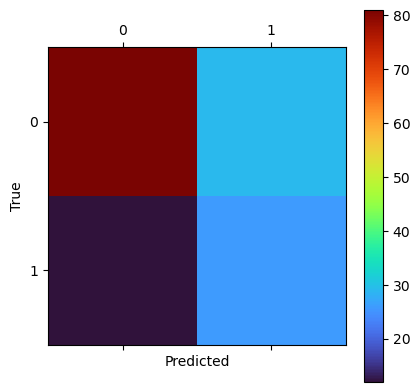

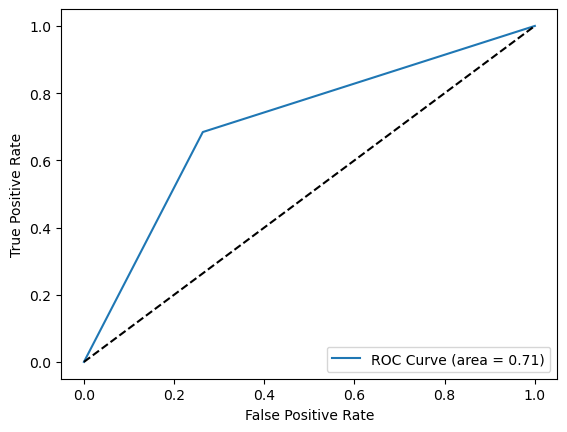

In [41]:
# Importing the necessary libraries
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import pandas as pd

df=pd.read_csv('diabetes (1).csv')

# Predicting the target variable using the decision tree model on the test set
y_pred = treeclassifier.predict(X_test)

# Computing the various metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Printing the various metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Creating a confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.matshow(cm, cmap='turbo')
plt.colorbar()
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Creating an ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc_score = roc_auc_score(y_test, y_pred)
plt.plot(fpr, tpr, label='ROC Curve (area = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

## Q6. Interpret the decision tree by examining the splits, branches, and leaves. Identify the most important variables and their thresholds. Use domain knowledge and common sense to explain the patterns and trends.

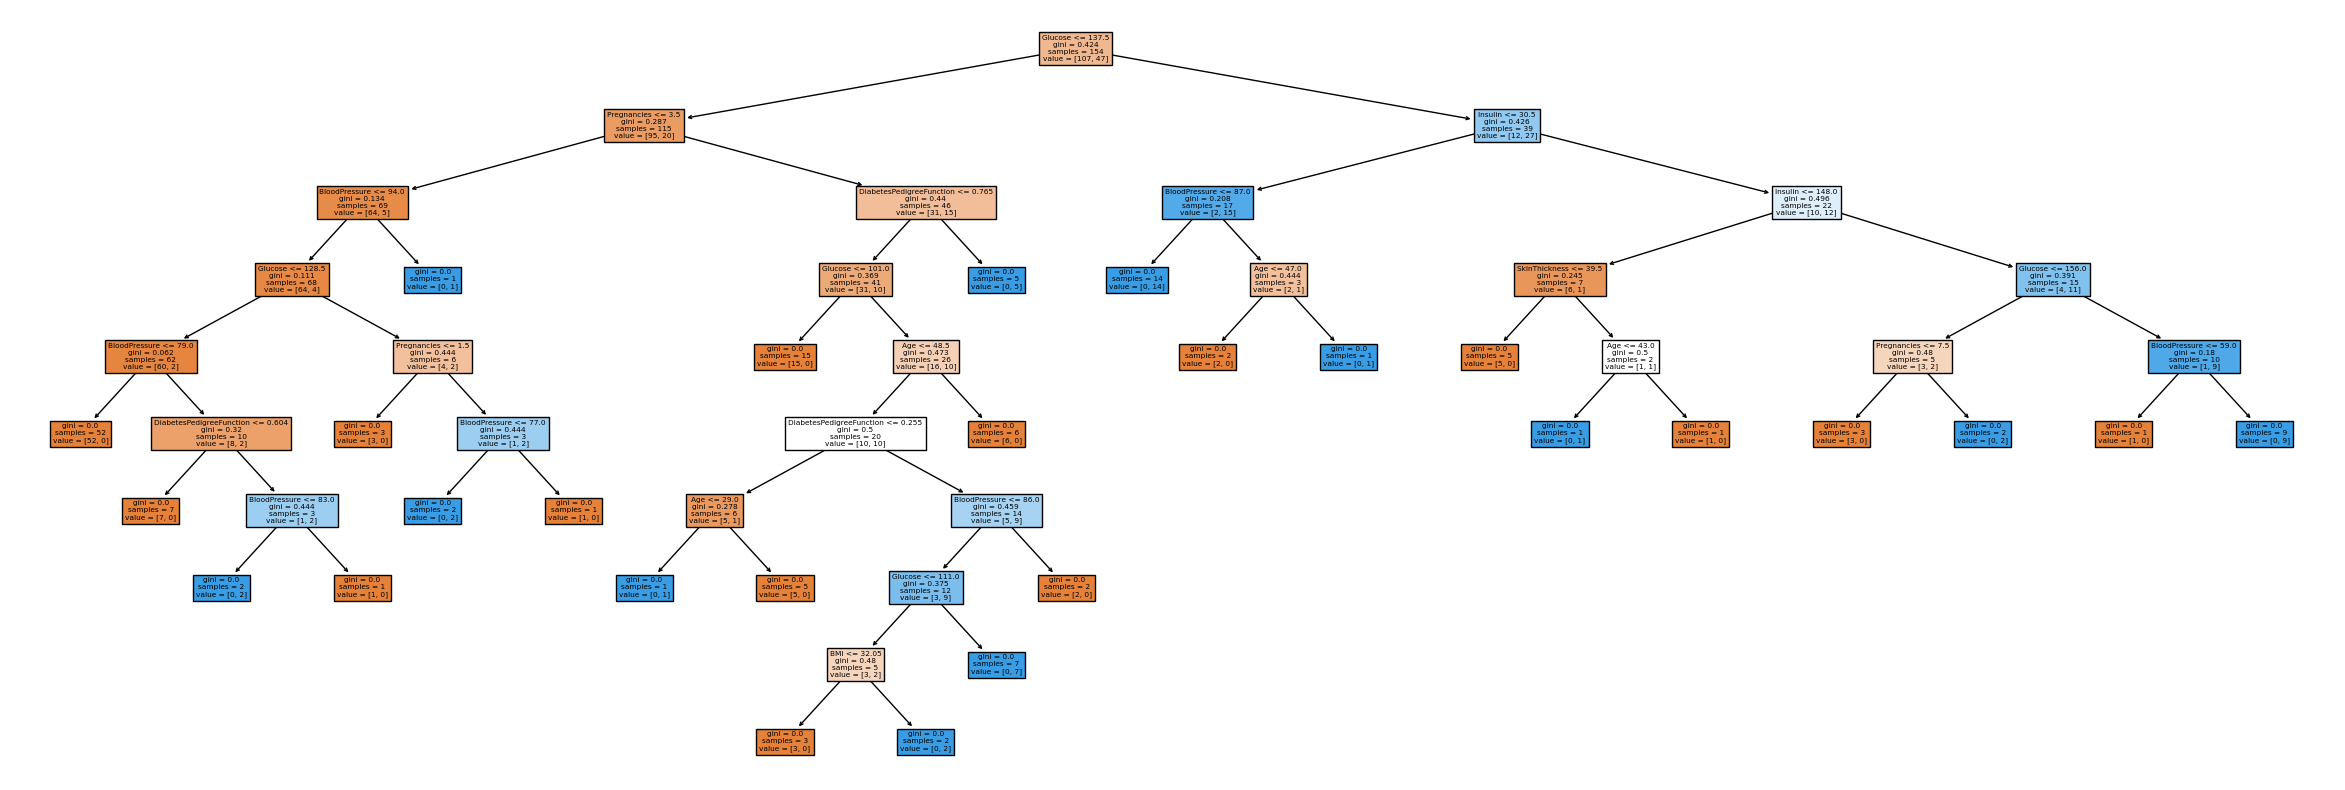

In [57]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('diabetes (1).csv')

# Split the dataset into input variables (X) and the target variable (y)
X = data.drop('Outcome', axis=1)
y = data['Outcome']

# Split the dataset into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Create a decision tree classifier
clf = DecisionTreeClassifier()

# Train the decision tree classifier on the training set
clf.fit(X_test, y_test)

# Visualize the decision tree
plt.figure(figsize=(30,10))
plot_tree(clf, filled=True, feature_names=X.columns)
plt.show()


## Q7. Validate the decision tree model by applying it to new data or testing its robustness to changes in the dataset or the environment. Use sensitivity analysis and scenario testing to explore the uncertainty and risks.

 Validating a machine learning model is an important step in ensuring that the model is robust and reliable. Here are some ways to validate the decision tree model and test its robustness:

- Applying the model to new data: The most straightforward way to validate the model is to apply it to a completely new dataset and evaluate its performance. This can be done by collecting new data from similar sources or by using publicly available datasets. The model's performance on the new dataset can be compared with its performance on the original test set to assess its generalization ability.

- Testing the model's robustness: Another way to validate the model is to test its robustness to changes in the dataset or the environment. This can be done by introducing noise or perturbations to the input data and evaluating the model's performance. For example, we can randomly remove or add some features or data points and check how the model performs.

- Sensitivity analysis: Sensitivity analysis involves varying the input features within a certain range to see how the model's predictions change. This can help identify which input features are most sensitive to changes and how they affect the model's performance. For example, we can vary the Glucose and BMI levels within a certain range and see how the model's predictions change.

- Scenario testing: Scenario testing involves testing the model's performance under different scenarios or conditions. For example, we can test how the model performs when the prevalence of diabetes in the population changes, or when the cost of misclassification varies. This can help identify potential risks and uncertainties associated with the model and inform decision-making.

Overall, validating the decision tree model is an ongoing process that requires careful consideration of various factors such as data quality, generalization ability, robustness, and uncertainty. By applying different validation methods and exploring different scenarios, we can better understand the model's strengths and limitations and make more informed decisions.